In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import nibabel as nib
from typing import List


%matplotlib inline


In [2]:
# Utils ..
def maybe_mkdir_p(directory: str) -> None:
    os.makedirs(directory, exist_ok=True)
    
def subdirs(folder: str, join: bool = True, prefix: str = None, suffix: str = None, sort: bool = True) -> List[str]:
    if join:
        l = os.path.join
    else:
        l = lambda x, y: y
    res = [l(folder, i) for i in os.listdir(folder) if os.path.isdir(os.path.join(folder, i))
           and (prefix is None or i.startswith(prefix))
           and (suffix is None or i.endswith(suffix))]
    if sort:
        res.sort()
    return res

def subfiles(folder: str, join: bool = True, prefix: str = None, suffix: str = None, sort: bool = True) -> List[str]:
    if join:
        l = os.path.join
    else:
        l = lambda x, y: y
    res = [l(folder, i) for i in os.listdir(folder) if os.path.isfile(os.path.join(folder, i))
           and (prefix is None or i.startswith(prefix))
           and (suffix is None or i.endswith(suffix))]
    if sort:
        res.sort()
    return res

In [3]:
def volume_rate(Task_input: str):
    
    # Task_input : 'Task480_GRSR', 'Task481_NDDR', 'Task482_BFCR', 'Task483_MSCR', 'Task484_SIRL', 
    #              'Task485_GRSL', 'Task486_NDHL', 'Task487_CLALM3MT', 'Task488_CLALUCUK'
    
    Model_path = '/tf/backup/working/nnUNet/nnunet/nnUNet_trained_models/nnUNet/2d/'
    
    Task_Path = os.path.join(Model_path, Task_input, 'nnUNetTrainerV2__nnUNetPlansv2.1/gt_niftis/')
    
    task_file_list = subfiles(Task_Path, join=False, suffix='.nii.gz')
    
    Task_Total_Volume = []
    tfl_v_total = []
    tfl_v_min = []
    
    for tfl in task_file_list:
        
        task_file_path = os.path.join(Task_Path, tfl)
        task_file = np.array(nib.load(task_file_path).dataobj)
        tfl_x, tfl_y, tfl_z = task_file.shape

        print(tfl, ', shape :', '({}, {}, {})'.format(tfl_x, tfl_y, tfl_z), ', Volume Rate :', np.mean(task_file))
        
        tfl_v = []
        
        for tf_ in range(tfl_z):
            
            tfl_v.append(np.mean(task_file[:,:,tf_]))

        plt.title(tfl)
        plt.hist(tfl_v, bins=20)
        plt.show()
        
        Task_Total_Volume.append(np.mean(tfl_v))
        
        tfl_v_total.extend(tfl_v)
        
        
    task_volume_rate = np.mean(Task_Total_Volume)
    
    tfl_v_min = np.min(tfl_v_total)
    
    plt.title('{} Total'.format(Task_input))
    plt.hist(tfl_v_total, bins=100)
    plt.axvline(x=task_volume_rate, color='red', label='Mean Volume Rate')
    plt.axvline(x=tfl_v_min, ls='--', color='g', label='Min Volume Rate')
    plt.legend()
    plt.show()
    
    print('Mean Volume :', task_volume_rate, '\nMin Volume : ', tfl_v_min)
    
    return task_volume_rate, tfl_v_total

# Volume Rate Calculation

In [ ]:
# Task_input : 'Task480_GRSR', 'Task481_NDDR', 'Task482_BFCR', 'Task483_MSCR', 'Task484_SIRL', 
#              'Task485_GRSL', 'Task486_NDHL', 'Task487_CLALM3MT', 'Task488_CLALUCUK'

SNUH_DC07_JCW0_RALP_0001.nii.gz , shape : (512, 512, 91) , Volume Rate : 0.13140923636300222


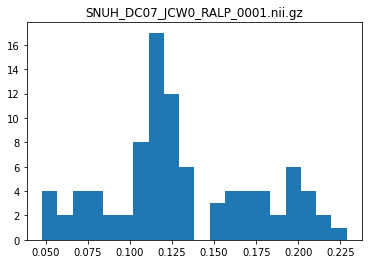

SNUH_DC07_JCW0_RALP_0002.nii.gz , shape : (512, 512, 54) , Volume Rate : 0.08816810890480324


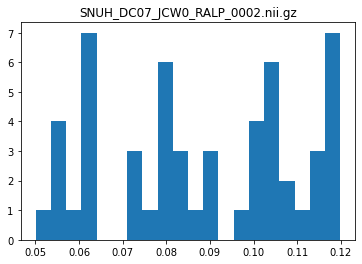

SNUH_DC07_JCW0_RALP_0011.nii.gz , shape : (512, 512, 358) , Volume Rate : 0.07109344738155769


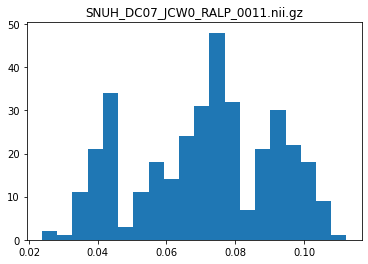

SNUH_DC07_JCW0_RALP_0021.nii.gz , shape : (512, 512, 137) , Volume Rate : 0.12194980147981295


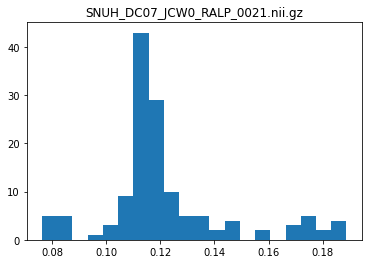

SNUH_DC07_JCW0_RALP_0031.nii.gz , shape : (512, 512, 35) , Volume Rate : 0.10526133946010045


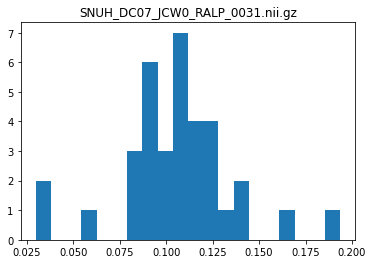

SNUH_DC07_JCW0_RLPN_0003.nii.gz , shape : (512, 512, 3) , Volume Rate : 0.07402801513671875


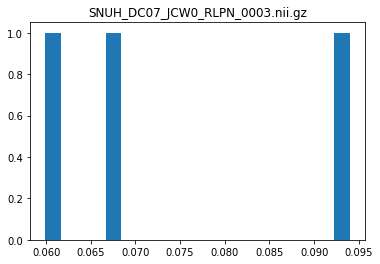

SNUH_DC07_JCW0_RLPN_0004.nii.gz , shape : (512, 512, 1) , Volume Rate : 0.16539764404296875


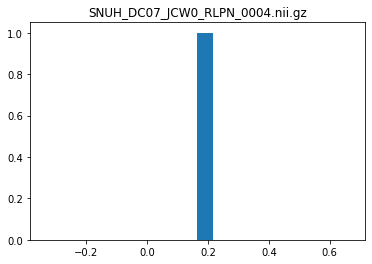

SNUH_DC16_KSH0_LDG0_0031.nii.gz , shape : (512, 512, 16) , Volume Rate : 0.13700628280639648


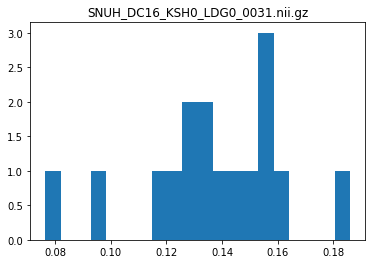

SNUH_DC16_KSH0_LDG0_0032.nii.gz , shape : (512, 512, 13) , Volume Rate : 0.10602158766526443


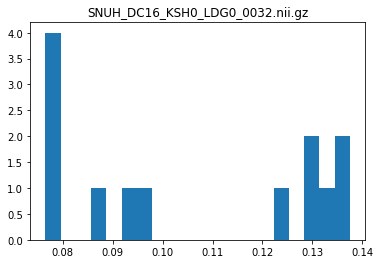

SNUH_DC16_KSH0_LDG0_0033.nii.gz , shape : (512, 512, 2) , Volume Rate : 0.1272106170654297


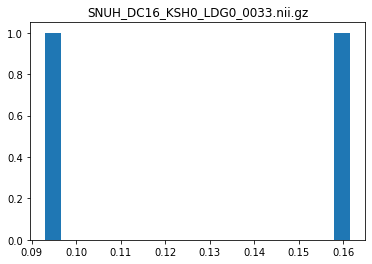

SNUH_DC16_KSH0_LDG0_0035.nii.gz , shape : (512, 512, 15) , Volume Rate : 0.19940872192382814


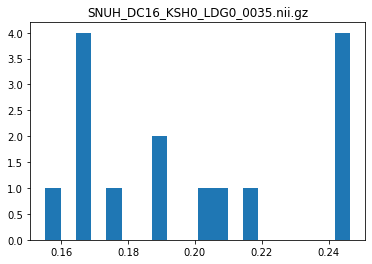

SNUH_DC16_KSH0_LDG0_0036.nii.gz , shape : (512, 512, 45) , Volume Rate : 0.11302117241753472


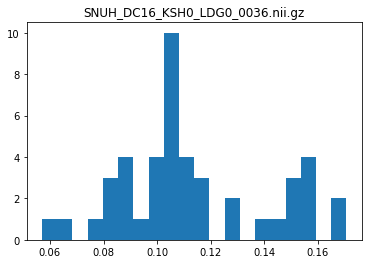

SNUH_DC16_KSH0_LDG0_0041.nii.gz , shape : (512, 512, 15) , Volume Rate : 0.18378753662109376


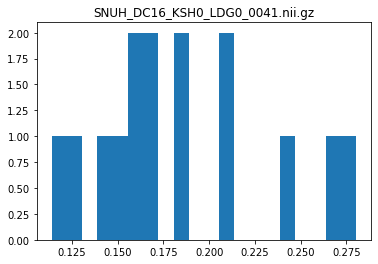

SNUH_DC16_KSH0_LDG0_0042.nii.gz , shape : (512, 512, 10) , Volume Rate : 0.10886726379394532


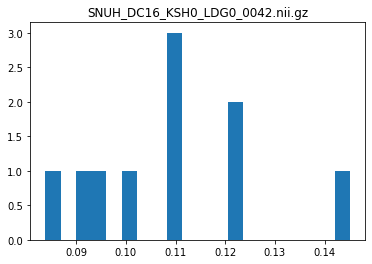

SNUH_DC16_KSH0_LDG0_0043.nii.gz , shape : (512, 512, 10) , Volume Rate : 0.137713623046875


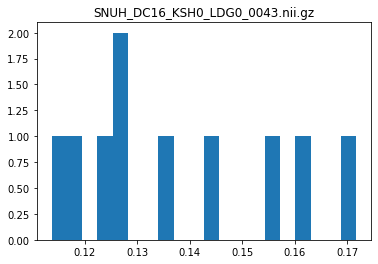

SNUH_DC16_KSH0_LDG0_0044.nii.gz , shape : (512, 512, 10) , Volume Rate : 0.10683441162109375


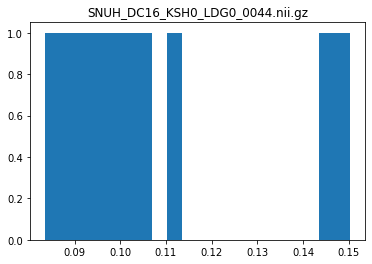

SNUH_DC16_KSH0_LDG0_0047.nii.gz , shape : (512, 512, 30) , Volume Rate : 0.15276400248209634


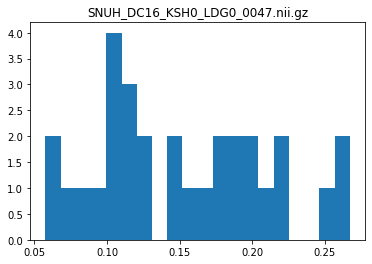

SNUH_DC16_KSH0_LDG0_0048.nii.gz , shape : (512, 512, 15) , Volume Rate : 0.17530695597330728


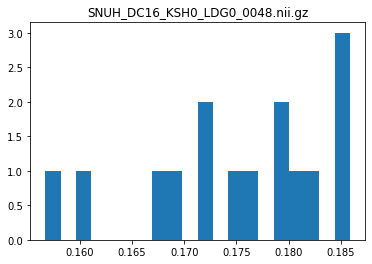

SNUH_DC16_KSH0_LDG0_0051.nii.gz , shape : (512, 512, 10) , Volume Rate : 0.19988327026367186


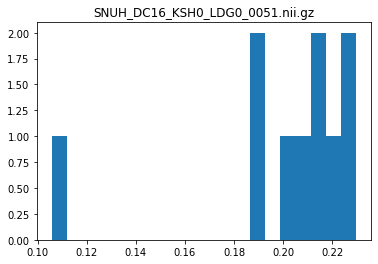

SNUH_DC16_KSH0_LDG0_0053.nii.gz , shape : (512, 512, 13) , Volume Rate : 0.20525594858022836


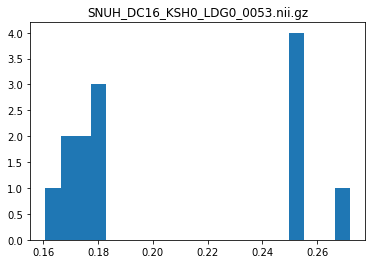

SNUH_DC16_KSH0_LDG0_0054.nii.gz , shape : (512, 512, 39) , Volume Rate : 0.16714634039463142


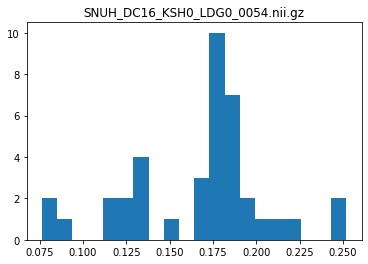

SNUH_DC16_KSH0_LDG0_0057.nii.gz , shape : (512, 512, 9) , Volume Rate : 0.14158418443467882


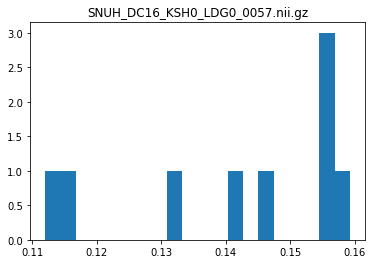

SNUH_DC16_PJW0_LAR0_0004.nii.gz , shape : (512, 512, 11) , Volume Rate : 0.12786899913441052


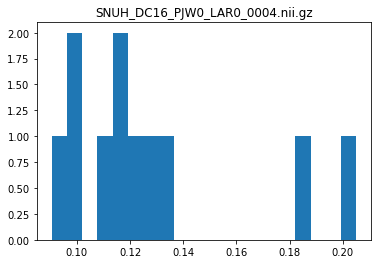

SNUH_DC16_PJW0_LAR0_0008.nii.gz , shape : (512, 512, 27) , Volume Rate : 0.1437199910481771


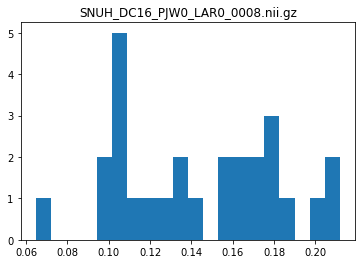

SNUH_DC16_PJW0_LAR0_0010.nii.gz , shape : (512, 512, 44) , Volume Rate : 0.13273161107843573


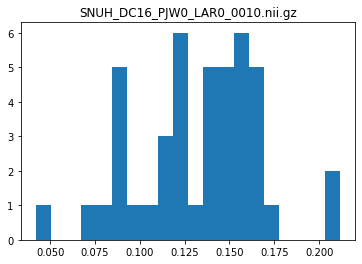

SNUH_DC16_PJW0_RHC0_0007.nii.gz , shape : (512, 512, 6) , Volume Rate : 0.142120361328125


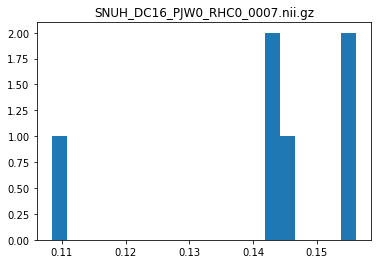

SNUH_DC16_RSB0_LAR0_0002.nii.gz , shape : (512, 512, 33) , Volume Rate : 0.10234185421105588


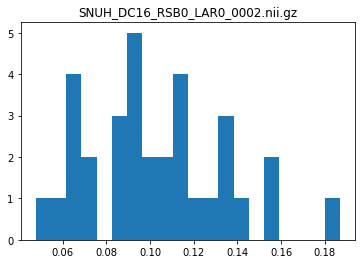

SNUH_DC16_RSB0_LAR0_0004.nii.gz , shape : (512, 512, 41) , Volume Rate : 0.11285177091272866


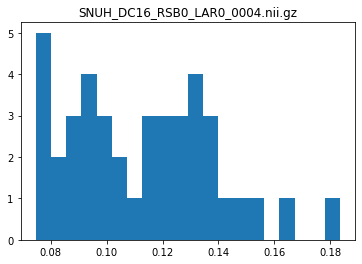

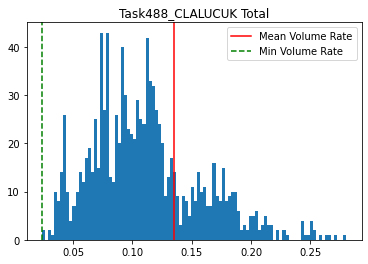

Mean Volume : 0.13502693212757044 
Min Volume :  0.023807525634765625


In [35]:
Volume_rate, task_volume_list = volume_rate(Task_input='Task488_CLALUCUK') # Task_input <- 


In [37]:
Task_Threshold = {'Task480_GRSR': 0.011768341064453125*0.9,
                 'Task481_NDDR': 0.007961273193359375*0.9,
                 'Task482_BFCR': 0.010486602783203125*0.9,
                 'Task483_MSCR': 0.00832366943359375*0.9,
                 'Task484_SIRL': 0.004627227783203125*0.9,
                 'Task485_GRSL': 0.00714874267578125*0.9,
                 'Task486_NDHL': 0.009521484375*0.9,
                 'Task487_CLALM3MT': 0.0224609375*0.9,
                 'Task488_CLALUCUK': 0.023807525634765625*0.9}
Task_Threshold

{'Task480_GRSR': 0.010591506958007812,
 'Task481_NDDR': 0.007165145874023437,
 'Task482_BFCR': 0.009437942504882812,
 'Task483_MSCR': 0.007491302490234375,
 'Task484_SIRL': 0.004164505004882813,
 'Task485_GRSL': 0.0064338684082031255,
 'Task486_NDHL': 0.0085693359375,
 'Task487_CLALM3MT': 0.02021484375,
 'Task488_CLALUCUK': 0.021426773071289065}

In [339]:
def volume_rate_noplt(Task_input: str) -> list:
    
    # Task_input : 'Task480_GRSR', 'Task481_NDDR', 'Task482_BFCR', 'Task483_MSCR', 'Task484_SIRL', 
    #              'Task485_GRSL', 'Task486_NDHL', 'Task487_CLALM3MT', 'Task488_CLALUCUK'
    
    Model_path = '/tf/backup/working/nnUNet/nnunet/nnUNet_trained_models/nnUNet/2d/'
    
    Task_Path = os.path.join(Model_path, Task_input, 'nnUNetTrainerV2__nnUNetPlansv2.1/gt_niftis/')
    
    task_file_list = subfiles(Task_Path, join=False, suffix='.nii.gz')
    
    Task_Total_Volume = []
    tfl_v_total = []
    tfl_v_min = []
    
    for tfl in task_file_list:
        
        task_file_path = os.path.join(Task_Path, tfl)
        task_file = np.array(nib.load(task_file_path).dataobj)
        tfl_x, tfl_y, tfl_z = task_file.shape

        print(tfl, ', shape :', '({}, {}, {})'.format(tfl_x, tfl_y, tfl_z), ', Volume Rate :', np.mean(task_file))
        
        tfl_v = []
        
        for tf_ in range(tfl_z):
            
            tfl_v.append(np.mean(task_file[:,:,tf_]))

        Task_Total_Volume.append(np.mean(tfl_v))
        
        tfl_v_total.extend(tfl_v)
        
        
    task_volume_rate = np.mean(Task_Total_Volume)
    
    tfl_v_min = np.min(tfl_v_total)
    
    print('Mean Volume :', task_volume_rate, '\nMin Volume : ', tfl_v_min)
    
    return tfl_v_total

In [373]:
Task_List = subdirs('/tf/backup/working/nnUNet/nnunet/nnUNet_trained_models/nnUNet/2d/', join=False, prefix='Task')
Task_List = ['Task480_GRSR',
             'Task481_NDDR',
             'Task482_BFCR',
             'Task483_MSCR',
             'Task484_SIRL',
             'Task485_GRSL',
             'Task486_NDHL',
             'Task487_CLALM3MT',
             'Task488_CLALUCUK']


data_a = volume_rate_noplt(Task_List[0])
data_b = volume_rate_noplt(Task_List[1])
data_c = volume_rate_noplt(Task_List[2])
data_d = volume_rate_noplt(Task_List[3])
data_e = volume_rate_noplt(Task_List[4])
data_f = volume_rate_noplt(Task_List[5])
data_g = volume_rate_noplt(Task_List[6])
data_h = volume_rate_noplt(Task_List[7])
data_i = volume_rate_noplt(Task_List[8])

GGHB_DC68_LJH0_BABA_0002.nii.gz , shape : (512, 512, 57) , Volume Rate : 0.1377032765170984
GGHB_DC68_LJH0_BABA_0003.nii.gz , shape : (512, 512, 149) , Volume Rate : 0.11313921013134438
SNUH_DC07_JCW0_RALP_0000.nii.gz , shape : (512, 512, 96) , Volume Rate : 0.07014270623524983
SNUH_DC07_JCW0_RALP_0001.nii.gz , shape : (512, 512, 145) , Volume Rate : 0.06219408758755388
SNUH_DC07_JCW0_RALP_0002.nii.gz , shape : (512, 512, 83) , Volume Rate : 0.07009644106209996
SNUH_DC07_JCW0_RALP_0011.nii.gz , shape : (512, 512, 111) , Volume Rate : 0.07160509814013231
SNUH_DC07_JCW0_RALP_0020.nii.gz , shape : (512, 512, 213) , Volume Rate : 0.056329843583800984
SNUH_DC07_JCW0_RALP_0021.nii.gz , shape : (512, 512, 67) , Volume Rate : 0.07343964078533116
SNUH_DC07_JCW0_RALP_0031.nii.gz , shape : (512, 512, 150) , Volume Rate : 0.0687597401936849
SNUH_DC07_JCW0_RLPN_0002.nii.gz , shape : (512, 512, 90) , Volume Rate : 0.08271700541178385
SNUH_DC07_JCW0_RLPN_0003.nii.gz , shape : (512, 512, 123) , Volume

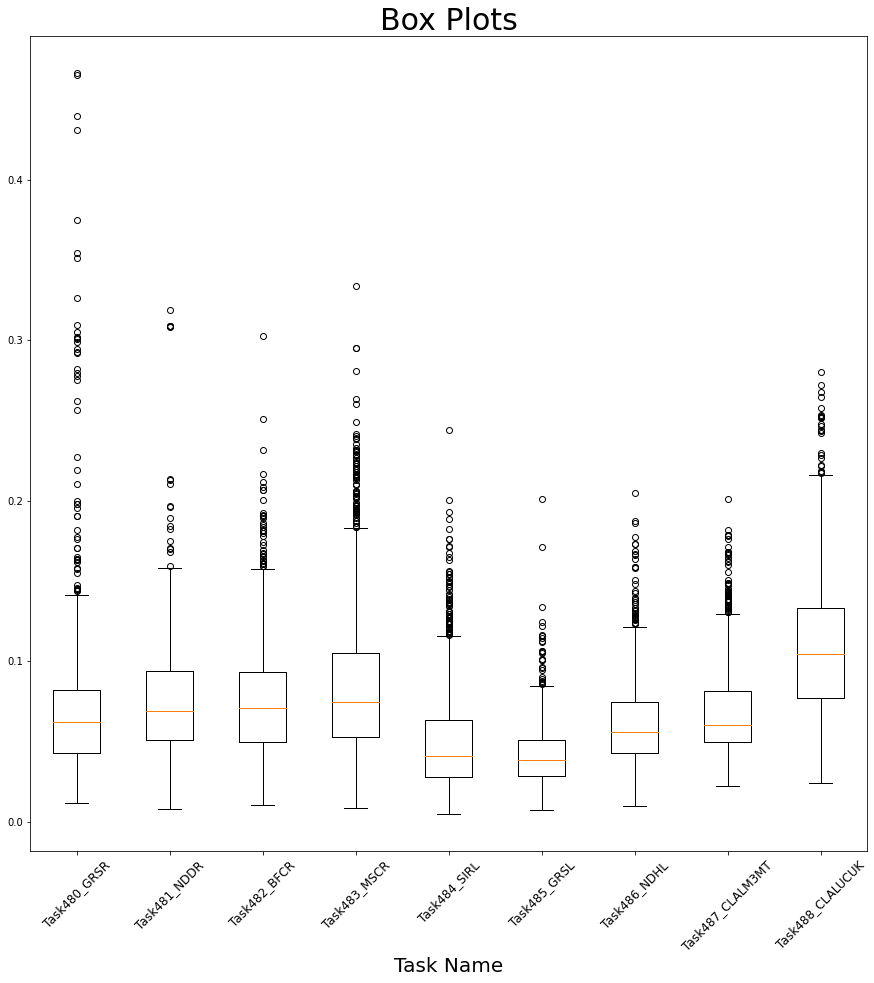

In [375]:
fig, ax = plt.subplots(figsize=(15,15))

ax.boxplot([data_a, data_b, data_c, data_d, data_e, data_f, data_g, data_h, data_i])
ax.set_ylim()
ax.set_xlabel('Task Name', size=20)
plt.title('Box Plots', size=30)
plt.xticks([1,2,3,4,5,6,7,8,9],
          [Task_List[0], Task_List[1], Task_List[2], Task_List[3], Task_List[4], Task_List[5], Task_List[6], Task_List[7], Task_List[8]],
           rotation=45, fontsize=12)

plt.show()

In [ ]:
### Visualization ###

In [17]:
def predict_view(NUM: str, test_arr1: str, test_arr2: str, test_arr3: str, test_arr4: str, test_arr5: str, test_arr6: str,
                 test_arr7: str, test_arr8: str, test_arr9: str, test_arr10: str):
    
    # subplot(sub_x, sub_y, sub_z)
    
    sub_x, sub_y = 3, 4
    
    plt.figure(figsize=(15,15))
    
    image_arr1 = np.array(nib.load(test_arr1).dataobj)
    image_arr2 = np.array(nib.load(test_arr2).dataobj)
    image_arr3 = np.array(nib.load(test_arr3).dataobj)
    image_arr4 = np.array(nib.load(test_arr4).dataobj)
    image_arr5 = np.array(nib.load(test_arr5).dataobj)
    image_arr6 = np.array(nib.load(test_arr6).dataobj)
    image_arr7 = np.array(nib.load(test_arr7).dataobj)
    image_arr8 = np.array(nib.load(test_arr8).dataobj)
    image_arr9 = np.array(nib.load(test_arr9).dataobj)
    image_arr10 = np.array(nib.load(test_arr10).dataobj)
    
    
    plt.subplot(sub_x, sub_y ,1)
    plt.imshow(image_arr1[:, :, NUM])
    plt.axis('off')
    
    plt.subplot(sub_x, sub_y ,2)
    plt.imshow(image_arr2[:, :, NUM])
    plt.axis('off')
    
    plt.subplot(sub_x, sub_y ,3)
    plt.imshow(image_arr3[:, :, NUM])
    plt.axis('off')
    
    plt.subplot(sub_x, sub_y ,4)
    plt.imshow(image_arr4[:, :, NUM])
    plt.axis('off')
    
    plt.subplot(sub_x, sub_y ,5)
    plt.imshow(image_arr5[:, :, NUM])
    plt.axis('off')
    
    plt.subplot(sub_x, sub_y ,6)
    plt.imshow(image_arr6[:, :, NUM])
    plt.axis('off')
    
    plt.subplot(sub_x, sub_y ,7)
    plt.imshow(image_arr7[:, :, NUM])
    plt.axis('off')
    
    plt.subplot(sub_x, sub_y ,8)
    plt.imshow(image_arr8[:, :, NUM])
    plt.axis('off')
    
    plt.subplot(sub_x, sub_y ,9)
    plt.imshow(image_arr9[:, :, NUM])
    plt.axis('off')
    
    plt.subplot(sub_x, sub_y ,10)
    plt.imshow(image_arr10[:, :, NUM])
    plt.axis('off')

    plt.show()

Image ,  Task480_GRSR  ,  Task481_NDDR  ,  Task482_BFCR  ,  Task483_MSCR  ,  Task484_SIRL  ,  Task485_GRSL  ,  Task486_NDHL  ,  Task487_CLALM3MT  ,  Task488_CLALUCUK


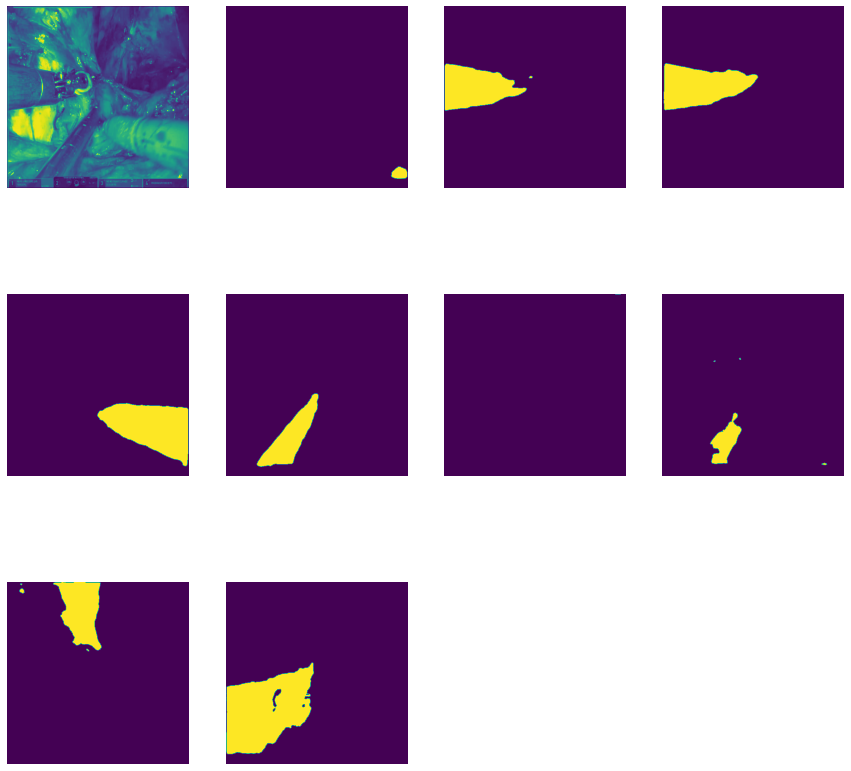

In [21]:
ima_dir = '/tf/temp/nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data/Task799_Inference/imagesTs/'
pred_dir = '/tf/backup/predict/'
pred_taskdir = subdirs(pred_dir, join=False, prefix='Task')

img_NUM = 'img_00100'

arr1_ = os.path.join(ima_dir, '{}_0000.nii.gz'.format(img_NUM))
arr2_ = os.path.join(pred_dir, pred_taskdir[0], '{}.nii.gz'.format(img_NUM))
arr3_ = os.path.join(pred_dir, pred_taskdir[1], '{}.nii.gz'.format(img_NUM))
arr4_ = os.path.join(pred_dir, pred_taskdir[2], '{}.nii.gz'.format(img_NUM))
arr5_ = os.path.join(pred_dir, pred_taskdir[3], '{}.nii.gz'.format(img_NUM))
arr6_ = os.path.join(pred_dir, pred_taskdir[4], '{}.nii.gz'.format(img_NUM))
arr7_ = os.path.join(pred_dir, pred_taskdir[5], '{}.nii.gz'.format(img_NUM))
arr8_ = os.path.join(pred_dir, pred_taskdir[6], '{}.nii.gz'.format(img_NUM))
arr9_ = os.path.join(pred_dir, pred_taskdir[7], '{}.nii.gz'.format(img_NUM))
arr10_ = os.path.join(pred_dir, pred_taskdir[8], '{}.nii.gz'.format(img_NUM))


print('Image , ', pred_taskdir[0],' , ', pred_taskdir[1],' , ', pred_taskdir[2],
      ' , ', pred_taskdir[3],' , ', pred_taskdir[4],' , ', pred_taskdir[5],
      ' , ', pred_taskdir[6], ' , ', pred_taskdir[7], ' , ', pred_taskdir[8])

predict_view(1, arr1_, arr2_, arr3_, arr4_, arr5_, arr6_, arr7_, arr8_, arr9_, arr10_)